In [1]:
!pip install --q tensorflow


In [2]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/content/drive/Othercomputers/My laptop/ANN_Multilayer/Churn_Modelling/Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [9]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [10]:
X = pd.concat([X, geography, gender], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)


In [12]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
4901,673,59,0,178058.06,2,0,1,21063.71,0,0,1
4375,850,41,8,60880.68,1,1,0,31825.84,1,0,1
6698,725,31,6,0.00,1,0,0,61326.43,0,0,0
9805,644,33,7,174571.36,1,0,1,43943.09,0,0,1
1101,703,29,9,0.00,2,1,0,50679.48,0,1,1


In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train.shape

(7500, 11)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [21]:
model = Sequential()


In [23]:
model.add(Dense(
    units = 11,
    activation='relu',
    ))

In [25]:
model.add(Dense(units=7, activation='relu'))

In [26]:
model.add(Dense(units=6, activation='relu'))

In [27]:
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
er = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    )

In [34]:

model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size=12, epochs=100, callbacks=er)

Epoch 1/100
419/419 [==============================] - 9s 5ms/step - loss: 0.4856 - accuracy: 0.7976 - val_loss: 0.4532 - val_accuracy: 0.8102
Epoch 2/100
419/419 [==============================] - 2s 5ms/step - loss: 0.4225 - accuracy: 0.8141 - val_loss: 0.4314 - val_accuracy: 0.8150
Epoch 3/100
419/419 [==============================] - 2s 4ms/step - loss: 0.4008 - accuracy: 0.8221 - val_loss: 0.4158 - val_accuracy: 0.8243
Epoch 4/100
419/419 [==============================] - 2s 4ms/step - loss: 0.3842 - accuracy: 0.8350 - val_loss: 0.4037 - val_accuracy: 0.8255
Epoch 5/100
419/419 [==============================] - 2s 4ms/step - loss: 0.3710 - accuracy: 0.8416 - val_loss: 0.3931 - val_accuracy: 0.8328
Epoch 6/100
419/419 [==============================] - 3s 7ms/step - loss: 0.3605 - accuracy: 0.8475 - val_loss: 0.3856 - val_accuracy: 0.8316
Epoch 7/100
419/419 [==============================] - 2s 5ms/step - loss: 0.3547 - accuracy: 0.8477 - val_loss: 0.3848 - val_accuracy: 0.8352

In [35]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

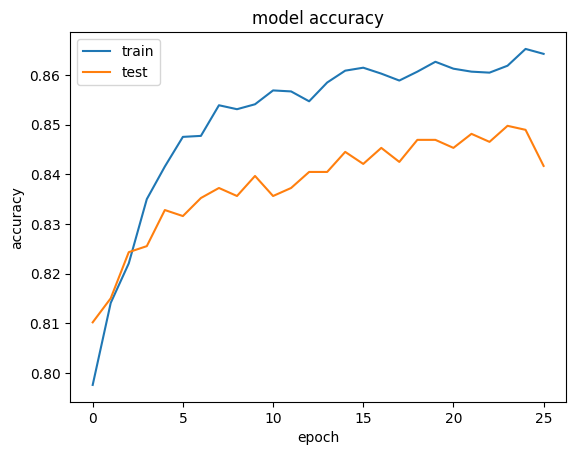

In [36]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

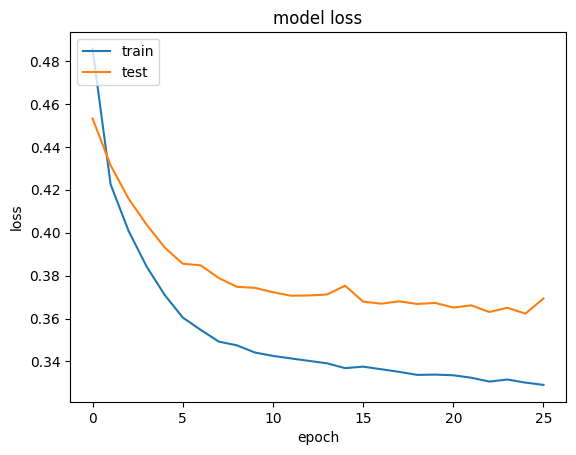

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

79/79 [==============================] - 0s 1ms/step


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1857,  146],
       [ 241,  256]])

In [44]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

score

0.8452